In [ ]:
import cv2
import numpy as np
from scipy import misc

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()

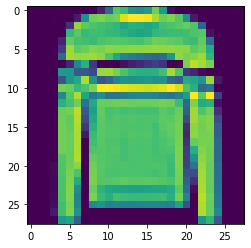

In [ ]:
target_image_index = 5
target_image = training_images[target_image_index]
plt.imshow(target_image)

In [ ]:
image_transformed = np.copy(target_image)
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

In [ ]:
filter = [[0,1,0], [1,-4,1], [0,1,0]]
weight = 1

In [ ]:
# code from tutorial: https://developers.google.com/codelabs/tensorflow-3-convolutions#7
for x in range(1, size_x - 1):
  for y in range(1, size_y-1):
      convolution = 0.0
      convolution = convolution + (target_image[x - 1, y-1] * filter[0][0])
      convolution = convolution + (target_image[x, y-1] * filter[0][1])
      convolution = convolution + (target_image[x + 1, y-1] * filter[0][2])
      convolution = convolution + (target_image[x-1, y] * filter[1][0])
      convolution = convolution + (target_image[x, y] * filter[1][1])
      convolution = convolution + (target_image[x+1, y] * filter[1][2])
      convolution = convolution + (target_image[x-1, y+1] * filter[2][0])
      convolution = convolution + (target_image[x, y+1] * filter[2][1])
      convolution = convolution + (target_image[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      image_transformed[x, y] = convolution


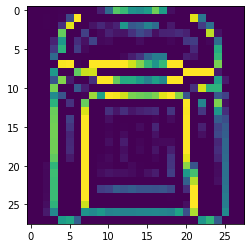

In [ ]:
plt.imshow(image_transformed)

In [ ]:
# code from tutorial: https://developers.google.com/codelabs/tensorflow-3-convolutions#7
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(image_transformed[x, y])
    pixels.append(image_transformed[x+1, y])
    pixels.append(image_transformed[x, y+1])
    pixels.append(image_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]

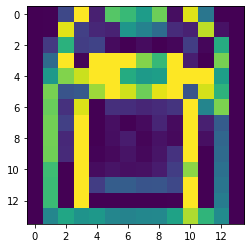

In [ ]:
plt.imshow(newImage)